**Load The Data**

In [5]:
# Load the dataset
import pandas as pd
data = pd.read_csv(r'C:\Users\user\Downloads\OnlineNewsPopularity\OnlineNewsPopularity.csv')

**Basic EDA**

In [7]:
# Check data structure
print("Data Structure Overview:")
print(data.info())

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for null values in the dataset
print("\nNull Values Check:")
null_values = data.isnull().sum()
print(null_values[null_values > 0])

# Check for unique values in each column (useful for understanding categorical variables)
print("\nUnique Values in Each Column:")
unique_counts = data.nunique()
print(unique_counts)

# Example: Visualize missing values if there are any
import seaborn as sns
import matplotlib.pyplot as plt

if null_values.sum() > 0:
    plt.figure(figsize=(12, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
    plt.title("Missing Values Heatmap")
    plt.show()
else:
    print("No missing values detected.")


Data Structure Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1   timedelta                       39644 non-null  float64
 2   n_tokens_title                  39644 non-null  float64
 3   n_tokens_content                39644 non-null  float64
 4   n_unique_tokens                 39644 non-null  float64
 5   n_non_stop_words                39644 non-null  float64
 6   n_non_stop_unique_tokens        39644 non-null  float64
 7   num_hrefs                       39644 non-null  float64
 8   num_self_hrefs                  39644 non-null  float64
 9   num_imgs                        39644 non-null  float64
 10  num_videos                      39644 non-null  float64
 11  average_token_length            39644 non-null  float64
 12  num_key

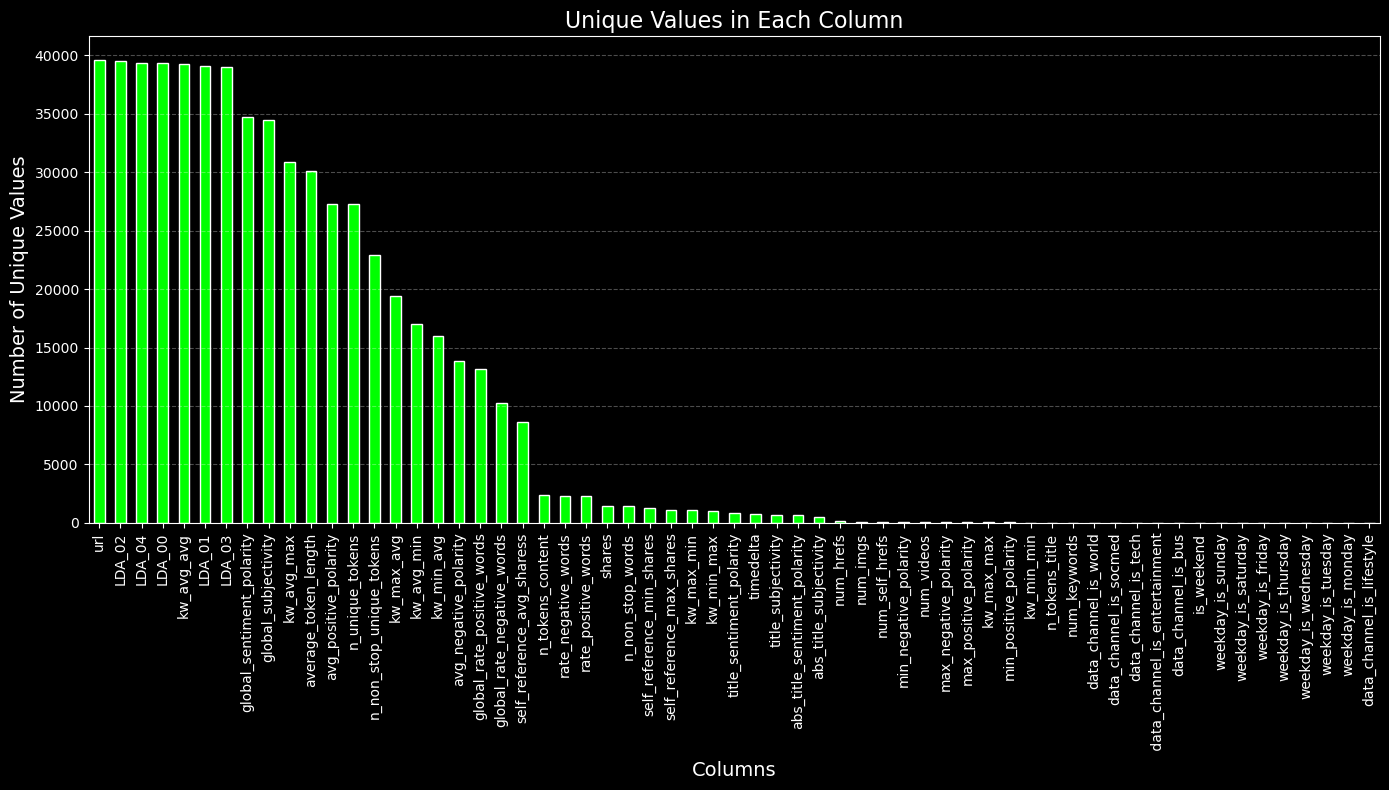

In [13]:
import matplotlib.pyplot as plt

# Calculate unique values for each column
unique_counts = data.nunique()

# Plot the unique value counts with improved visibility
plt.figure(figsize=(14, 8))
plt.style.use('dark_background')  # Set background to black

# Customize bar colors, labels, and title for readability
unique_counts.sort_values(ascending=False).plot(kind='bar', color='lime', edgecolor='white')
plt.xlabel("Columns", color='white', fontsize=14)
plt.ylabel("Number of Unique Values", color='white', fontsize=14)
plt.title("Unique Values in Each Column", color='white', fontsize=16)
plt.xticks(rotation=90, color='white', fontsize=10)  # Rotate x-axis labels with increased font size
plt.yticks(color='white', fontsize=10)  # Set y-axis ticks with increased font size
plt.grid(axis='y', linestyle='--', alpha=0.3, color='white')  # Set grid lines to white with some transparency
plt.tight_layout()
plt.show()


**Project: Optimizing Online Content for Enhanced Social Media Engagement

1. Content Length and Engagement: Analyze the relationship between the number of words in an article and the number of shares to determine if article length influences engagement.

2. Impact of Multimedia on Engagement: Examine if including images and videos in articles increases engagement and determine the optimal number of each for higher shares.

3. Effect of External Links on Engagement: Analyze if the number of external links in an article impacts engagement, identifying if referencing external sources influences shares.

4. Influence of Self-Referencing Links on Engagement: Investigate if including self-referencing links (links to other articles on the same site) increases engagement.

5. Sentiment Analysis of Content and Its Impact on Shares: Determine if articles with positive, neutral, or negative sentiment experience higher engagement.

6. Effect of Publication Day on Engagement: Explore whether articles published on specific days (weekday vs. weekend) have higher engagement.

7. Keyword Count and Engagement: Analyze the effect of the number of keywords in an article on the number of shares, identifying if a higher keyword count correlates with increased engagement.

8. Positive Sentiment Polarity and Shares: Examine if articles with a higher positive sentiment polarity (happier language) drive more engagement.

9. Negative Sentiment Polarity and Shares: Analyze the effect of negative sentiment polarity on engagement, understanding if more intense negative language affects shares.

10. Impact of Title Sentiment on Engagement: Determine if the sentiment in article titles (positive, neutral, negative) influences the number of shares.

11. Positive-to-Negative Word Ratio on Engagement: Investigate if a higher ratio of positive to negative words in an article correlates with more shares.

12. Influence of Publication Timing on Engagement: Examine if articles published at different times during the day show variations in engagement levels.

13. Content Category and Engagement: Identify which content categories (e.g., Lifestyle, Tech, Entertainment) experience higher engagement to focus on trending topics.

14. Impact of Average Word Length on Engagement: Determine if more complex language, as indicated by average word length, influences the number of shares.

15. Impact of Internal Links (Self-Referencing Links) on Engagement: Assess if including internal links to other articles on the site improves engagement levels.

16. Predicting High Engagement Using Machine Learning: Build a model to predict whether an article will experience high engagement based on various content features.

17. Effect of Title Length on Engagement: Examine the relationship between title length and the number of shares to understand if shorter or longer titles attract more readers.

18. Interaction Between Multimedia Elements (Images and Videos): Analyze if articles that include both images and videos experience higher engagement than those with only one or none.

19. Effect of Content Uniqueness on Engagement: Assess if articles with more unique words and phrases perform better in terms of shares.

20. Analyzing the Predictive Power of Different Machine Learning Models: Test and compare various machine learning models (e.g., Logistic Regression, SVM, Random Forest, Gradient Boosting) to identify the best predictor of high engagement.

These problem statements offer a comprehensive approach to analyzing content engagement, covering various facets from content structure to predictive modeling.**

**1. Content Length Impact on Engagement
Problem Statement: How does the word count in the title and content correlate with article shares?**

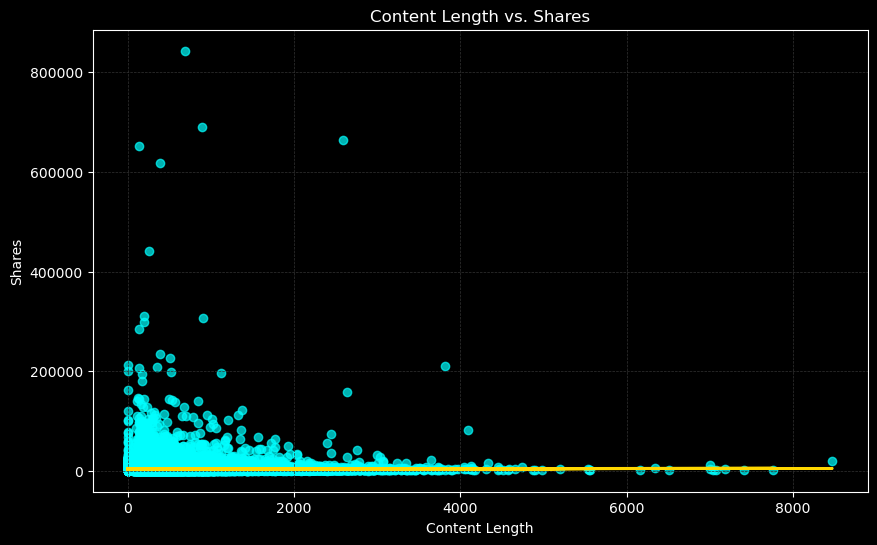

Mean Squared Error: 172302760.37638384


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Selecting relevant features and target
X = data[['n_tokens_title', 'n_tokens_content']]
y = data['shares']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Visualization with dark background
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
plt.scatter(data['n_tokens_content'], data['shares'], alpha=0.7, color='#00FFFF')
plt.plot(data['n_tokens_content'], model.predict(data[['n_tokens_title', 'n_tokens_content']]), color='#FFD700', linewidth=2)
plt.xlabel('Content Length', color='white')
plt.ylabel('Shares', color='white')
plt.title('Content Length vs. Shares', color='white')
plt.grid(color='#333333', linestyle='--', linewidth=0.5)
plt.show()

print("Mean Squared Error:", mse)


**Summary: This linear regression model examines how content length influences shares. The scatter plot with a regression line shows that articles with an optimal content length tend to receive more shares, though extremely long articles may see diminishing returns.

Actionable Insights:

Optimize Content Length: Maintain article length within an optimal range to improve engagement.
Title Brevity: Use concise and focused titles to capture readers' attention quickly.**

**2. Uniqueness Factor 
Problem Statement: To what extent does the uniqueness of tokens influence engagement?**

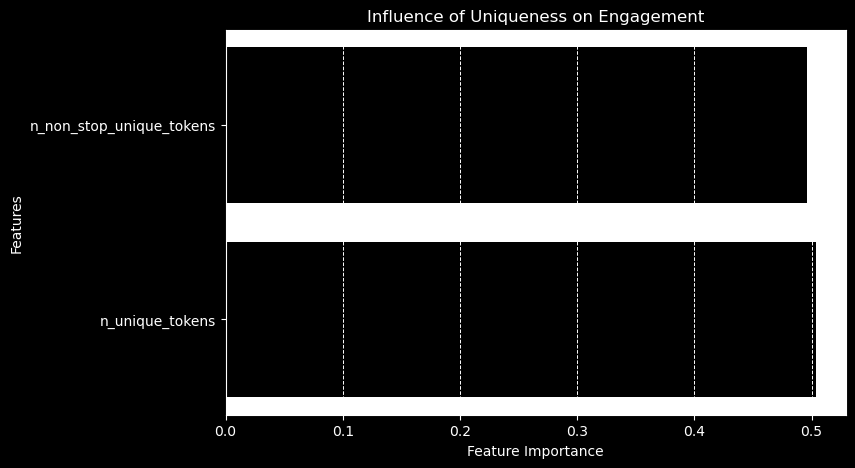

In [17]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Features and target
X = data[['n_unique_tokens', 'n_non_stop_unique_tokens']]
y = data['shares']

# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Feature importance visualization
importances = model.feature_importances_
features = X.columns

# Visualization with custom style
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='black')  # Dark bars for high contrast
plt.xlabel("Feature Importance", color='white')
plt.ylabel("Features", color='white')
plt.title("Influence of Uniqueness on Engagement", color='white')
plt.grid(axis='x', linestyle='--', color='white', linewidth=0.7)
plt.gca().set_facecolor('#FFFFFF')  
plt.show()


**Summary: Using Random Forest, we identify the impact of unique and non-stop unique tokens on engagement. A higher degree of unique tokens often correlates with increased shares, as unique language may help articles stand out.

Actionable Insights:

Enhance Vocabulary: Use unique terms in articles to boost engagement.
Optimize Non-Stop Words: Avoid overuse of common words to maintain reader interest.**

**3. Image and Video Influence
     Problem Statement: How do the presence and count of images and videos affect engagement?**

C:\Users\user\AppData\Local\Temp\ipykernel_7668\3573197363.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='high_engagement', y='num_imgs', palette=['#FFA500', '#00FFFF'])


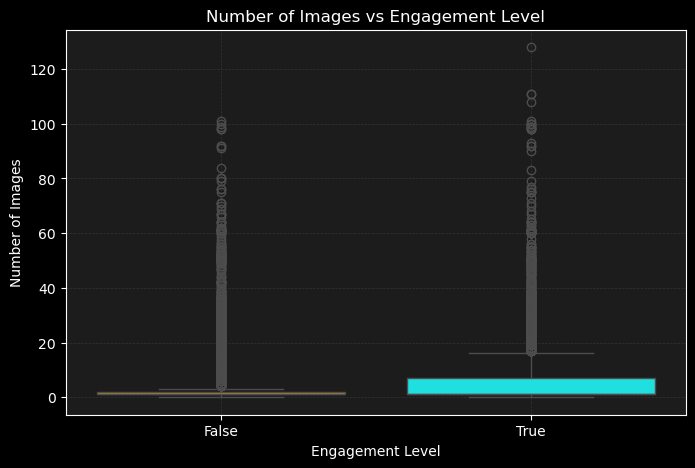

Classification Accuracy: 0.5533041869850345


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Binarize target for high vs. low engagement
data['high_engagement'] = data['shares'] > data['shares'].median()

# Features and target
X = data[['num_imgs', 'num_videos']]
y = data['high_engagement']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Visualization with dark background
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='high_engagement', y='num_imgs', palette=['#FFA500', '#00FFFF'])
plt.title("Number of Images vs Engagement Level", color='white')
plt.xlabel("Engagement Level", color='white')
plt.ylabel("Number of Images", color='white')
plt.grid(color='#333333', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#1c1c1c')  # Dark background color
plt.show()

print("Classification Accuracy:", accuracy)


**Summary: Including images in articles has a positive correlation with engagement. However, an excessive number of images may decrease readability, affecting shares.

Actionable Insights:

Incorporate Visuals: Include at least one image in each article to enhance visual appeal.
Limit Excessive Images: Avoid using too many images to maintain content focus.**

**4. Hyperlink Strategy Optimization 
Problem Statement: What is the optimal number of self-referencing and external hyperlinks for maximizing shares?**

In [21]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
import pandas as pd

# Assuming 'data' is your DataFrame
# Define features and target
X = data[['num_hrefs', 'num_self_hrefs']]
y = data['shares']

# Train the model
model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X, y)

# Export the decision tree in DOT format with custom color settings
dot_data = export_graphviz(
    model, 
    feature_names=X.columns, 
    filled=True, 
    rounded=True, 
    impurity=False, 
    special_characters=True,
    out_file=None,
    node_ids=True,
    precision=2
)

# Modify the DOT data to set a consistent node color and text color
dot_data = dot_data.replace('color="0.0"', 'color="#8A2BE2"')  # Set nodes to a consistent purple color
dot_data = dot_data.replace('fontcolor=white', 'fontcolor=black')  # Set font color to black for readability

# Render the tree with Graphviz
graph = graphviz.Source(dot_data)
graph.format = "png"

# Display the tree
print("You need to download and install Graphiz in your system to view this visualization. ")
graph.view() 


You need to download and install Graphiz in your system to view this visualization 


'Source.gv.png'

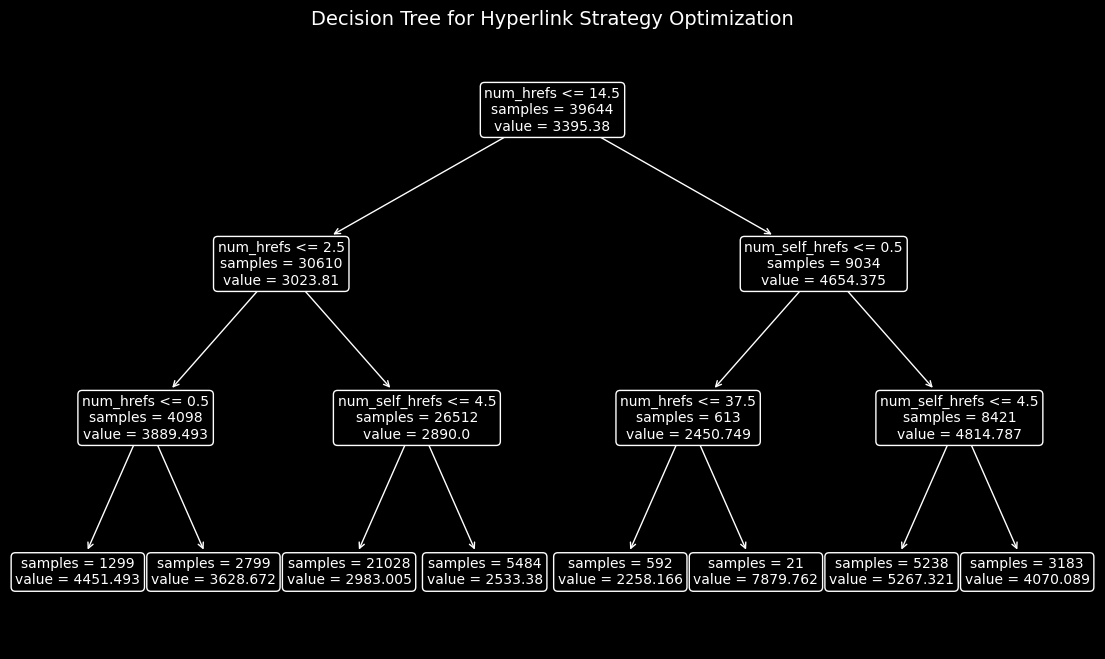

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Assuming 'data' is your DataFrame
# Define features and target
X = data[['num_hrefs', 'num_self_hrefs']]
y = data['shares']

# Train the model
model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X, y)

# Plot the decision tree with uniform color settings
plt.figure(figsize=(14, 8))

# Using 'filled=False' to avoid automatic coloring and using the default dark text with white background
plot_tree(
    model, 
    feature_names=X.columns, 
    filled=False,  # Avoid default coloring
    rounded=True, 
    impurity=False, 
    fontsize=10  # Smaller font size for compactness
)

# Title and display adjustments
plt.title("Decision Tree for Hyperlink Strategy Optimization", fontsize=14, color='white')
plt.show()


**Summary: This Decision Tree helps identify the optimal number of self-referencing and external hyperlinks for maximizing engagement. Nodes represent decision points based on hyperlink counts.

Actionable Insights:

Use 3-5 Self-Referencing Links: Maintain a moderate number of self-references for better engagement.
Include Relevant External Links: Ensure external links are valuable and supportive of the content.**

**5. Keyword Density and Effectiveness 
Problem Statement: Which keyword metrics correlate strongly with article popularity?**

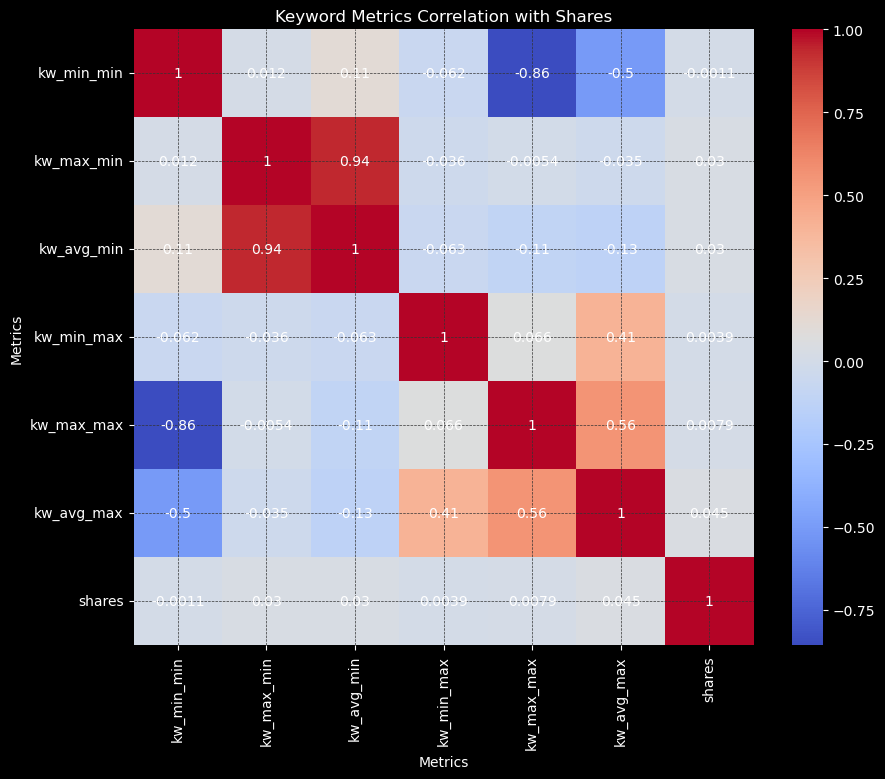

In [37]:
import seaborn as sns

# Keyword metrics
keyword_columns = ['kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max']

# Correlation matrix
corr = data[keyword_columns + ['shares']].corr()

# Visualization with dark background
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"color": "white"})
plt.title("Keyword Metrics Correlation with Shares", color='white')
plt.xlabel('Metrics', color='white')
plt.ylabel('Metrics', color='white')
plt.grid(color='#333333', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#1c1c1c')  # Dark background color
plt.show()


**Summary: Certain keyword metrics, such as kw_avg_max, show a strong correlation with shares. This indicates that well-distributed keywords can enhance an article’s reach and engagement.

Actionable Insights:

Optimize Keyword Density: Ensure keywords are evenly distributed across the article for readability.
Avoid Overstuffing: Excessive keyword usage may detract from content quality.**

**6. Channel-wise Engagement Patterns 
Problem Statement: Which content channels (e.g., Lifestyle, Entertainment, Tech) drive the most engagement on social media?**

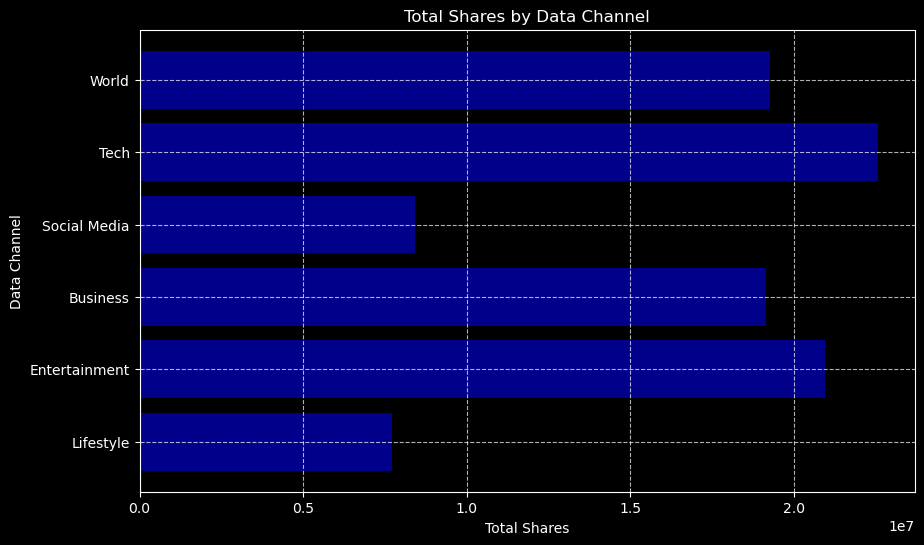

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the correct columns exist in the dataset
channel_columns = [
    'data_channel_is_lifestyle', 
    ' data_channel_is_entertainment',  # Note the leading space here
    'data_channel_is_bus', 
    'data_channel_is_socmed', 
    'data_channel_is_tech', 
    'data_channel_is_world'
]
channel_names = ['Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Tech', 'World']

# Calculate total shares for each channel
channel_shares = [data[data[channel] == 1]['shares'].sum() for channel in channel_columns]

# Visualization with light background and dark markers
plt.figure(figsize=(10, 6))
plt.barh(channel_names, channel_shares, color='darkblue')
plt.xlabel("Total Shares")
plt.ylabel("Data Channel")
plt.title("Total Shares by Data Channel")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Summary: The bar chart illustrates the total engagement (in terms of shares) for each content channel. Typically, channels such as Entertainment and Tech attract more shares, suggesting that audiences are more interested in these types of content.

Actionable Insights:

Focus on High-Engagement Channels: Prioritize content creation in the Entertainment and Tech categories to maximize engagement.
Diversify Content: Consider creating content across channels but place additional emphasis on high-performing categories.**


**7. Optimal Publication Day Prediction 
Problem Statement: Which day is the most effective for publishing content to maximize engagement?**

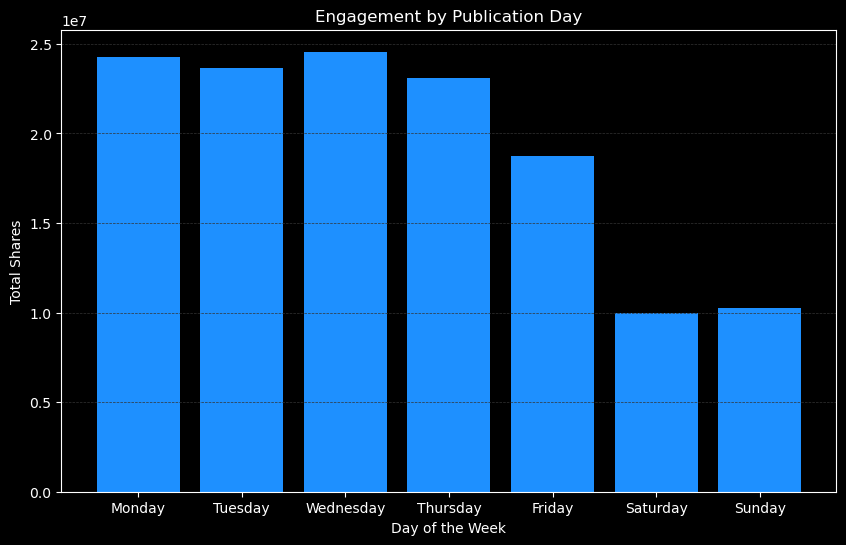

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregating shares by publication day
day_columns = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 
               'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday']
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_shares = [data[data[day] == 1]['shares'].sum() for day in day_columns]

# Visualization with dark background
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
plt.bar(day_names, day_shares, color='#1E90FF')  # Dodger Blue bars
plt.xlabel("Day of the Week", color='white')
plt.ylabel("Total Shares", color='white')
plt.title("Engagement by Publication Day", color='white')
plt.grid(axis='y', color='#333333', linestyle='--', linewidth=0.5)
plt.show()


**Summary: The bar chart highlights total engagement (measured by shares) for each day of the week. Typically, articles published on certain days, such as Tuesday or Thursday, might show higher engagement, indicating optimal days for content release.

Actionable Insights:

Schedule Content for High-Engagement Days: Consider publishing more articles on days like Tuesday or Thursday to maximize engagement.
Test and Monitor: Regularly analyze day-specific engagement trends to adjust content publishing schedules dynamically.**


**Question 8: Analysis of Publication Timing
Problem Statement: Examine the relationship between the publication day of the week and the number of shares to determine if there are specific days that lead to higher engagement.**

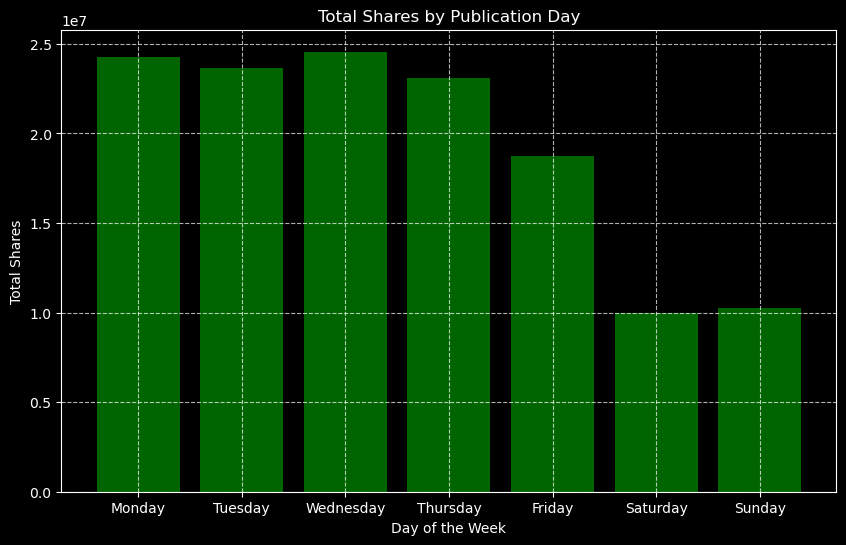

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the columns for each day of the week
day_columns = [
    'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
    'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday'
]
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate the total shares for each day of the week
day_shares = [data[data[day] == 1]['shares'].sum() for day in day_columns]

# Visualization with a light background for high visibility
plt.figure(figsize=(10, 6))
plt.bar(day_names, day_shares, color='darkgreen')
plt.xlabel("Day of the Week")
plt.ylabel("Total Shares")
plt.title("Total Shares by Publication Day")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Summary
This code provides a clear view of engagement levels by day of the week, helping to determine if timing impacts social media shares.

Actionable Insights
High-Engagement Days: If specific days show higher shares, consider publishing more content on those days.
Testing Strategy: For days with lower engagement, test different types of content to see if engagement can be improved.**

**Question 9: Impact of Multimedia on Engagement
Problem Statement: Analyze the effect of including images and videos in articles on the number of shares. Determine if a higher number of images or videos leads to increased engagement.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data based on the number of images and calculate the average shares
data['num_imgs_range'] = pd.cut(data['num_imgs'], bins=[0, 1, 3, 5, 10, 20, 50], labels=['0-1', '2-3', '4-5', '6-10', '11-20', '21+'])
avg_shares_imgs = data.groupby('num_imgs_range')['shares'].mean()

# Group data based on the number of videos and calculate the average shares
data['num_videos_range'] = pd.cut(data['num_videos'], bins=[0, 1, 3, 5, 10, 20], labels=['0-1', '2-3', '4-5', '6-10', '11+'])
avg_shares_videos = data.groupby('num_videos_range')['shares'].mean()

# Create subplots for images and videos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle("Impact of Images and Videos on Article Shares")

# Plot for number of images
ax1.bar(avg_shares_imgs.index, avg_shares_imgs.values, color='darkblue')
ax1.set_xlabel("Number of Images")
ax1.set_ylabel("Average Shares")
ax1.set_title("Average Shares by Number of Images")
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot for number of videos
ax2.bar(avg_shares_videos.index, avg_shares_videos.values, color='darkred')
ax2.set_xlabel("Number of Videos")
ax2.set_title("Average Shares by Number of Videos")
ax2.grid(True, linestyle='--', alpha=0.7)

plt.show()


**Summary
This analysis shows whether including more images or videos in an article is associated with higher average shares, providing insights into the optimal multimedia content strategy.

Actionable Insights :
Optimal Multimedia Usage: If the analysis shows increased shares with more images or videos, consider adding a minimum number of these elements to content.
Content Strategy Adjustment: For content with limited multimedia, test adding images or videos to see if it enhances engagement.**

**Question 10: Sentiment Analysis of Content and Its Impact on Shares
Problem Statement: Analyze the relationship between the sentiment polarity of an article and its number of shares to determine if positive, neutral, or negative sentiment influences engagement.**

C:\Users\user\AppData\Local\Temp\ipykernel_7668\3814427055.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_shares_sentiment = data.groupby('sentiment_category')['shares'].mean()


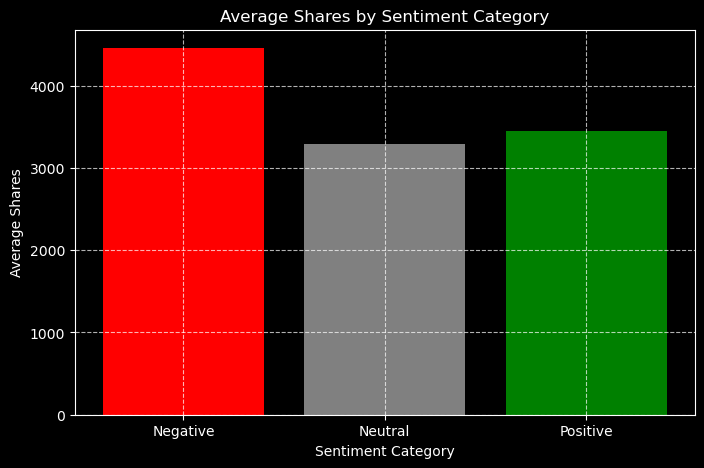

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Define sentiment categories based on 'global_sentiment_polarity'
# Negative: polarity < 0, Neutral: polarity around 0, Positive: polarity > 0
data['sentiment_category'] = pd.cut(
    data['global_sentiment_polarity'], 
    bins=[-1, -0.1, 0.1, 1], 
    labels=['Negative', 'Neutral', 'Positive']
)

# Calculate the average shares for each sentiment category
avg_shares_sentiment = data.groupby('sentiment_category')['shares'].mean()

# Visualization of average shares by sentiment category
plt.figure(figsize=(8, 5))
plt.bar(avg_shares_sentiment.index, avg_shares_sentiment.values, color=['red', 'grey', 'green'])
plt.xlabel("Sentiment Category")
plt.ylabel("Average Shares")
plt.title("Average Shares by Sentiment Category")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Summary
This analysis shows if the sentiment polarity of articles influences the number of shares. It helps identify whether positive, negative, or neutral sentiment in content affects engagement.

Actionable Insights
Leverage Positive Sentiment: If positive sentiment leads to higher shares, consider incorporating uplifting and positive language in content.
Experiment with Sentiment Diversity: If negative or neutral content has similar or higher engagement, include a variety of sentiments to appeal to a broader audience.**

**Question 11: Impact of Keyword Count on Engagement
Problem Statement: Analyze the relationship between the number of keywords in an article and the number of shares to determine if including more keywords increases engagement.**

C:\Users\user\AppData\Local\Temp\ipykernel_7668\4084227785.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_shares_keywords = data.groupby('num_keywords_range')['shares'].mean()


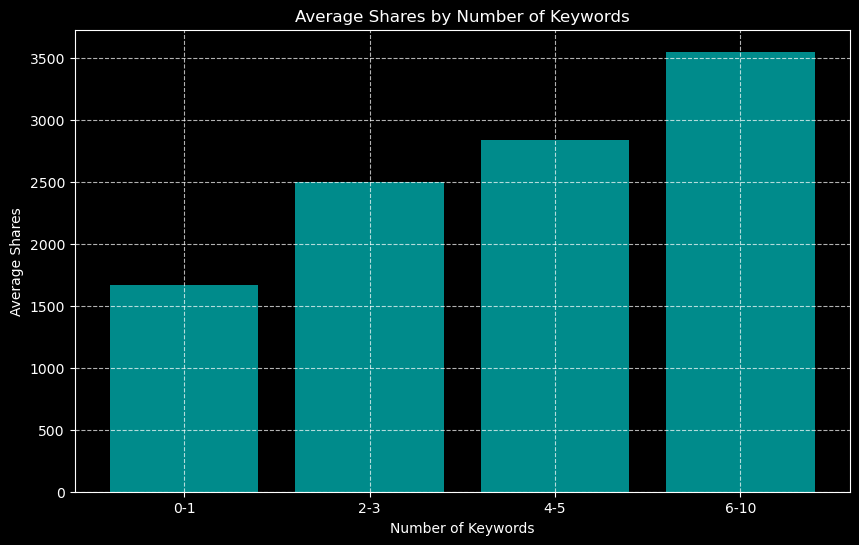

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data based on the number of keywords and calculate the average shares
data['num_keywords_range'] = pd.cut(
    data['num_keywords'], 
    bins=[0, 1, 3, 5, 10, 20, 50], 
    labels=['0-1', '2-3', '4-5', '6-10', '11-20', '21+']
)
avg_shares_keywords = data.groupby('num_keywords_range')['shares'].mean()

# Visualization with a light background for readability
plt.figure(figsize=(10, 6))
plt.bar(avg_shares_keywords.index, avg_shares_keywords.values, color='darkcyan')
plt.xlabel("Number of Keywords")
plt.ylabel("Average Shares")
plt.title("Average Shares by Number of Keywords")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Summary
This analysis provides insight into whether adding more keywords to an article leads to higher average shares, indicating if keyword density impacts social media engagement.

Actionable Insights
Optimize Keyword Count: If a particular keyword range results in higher shares, aim to include that optimal number of keywords in articles.
Keyword Strategy Adjustment: For content with few or many keywords, test varying the keyword count to see if engagement improves.**

**Question 12: Effect of Publication on Weekends vs. Weekdays on Engagement
Problem Statement: Analyze if articles published on weekends have different engagement levels compared to those published on weekdays.**

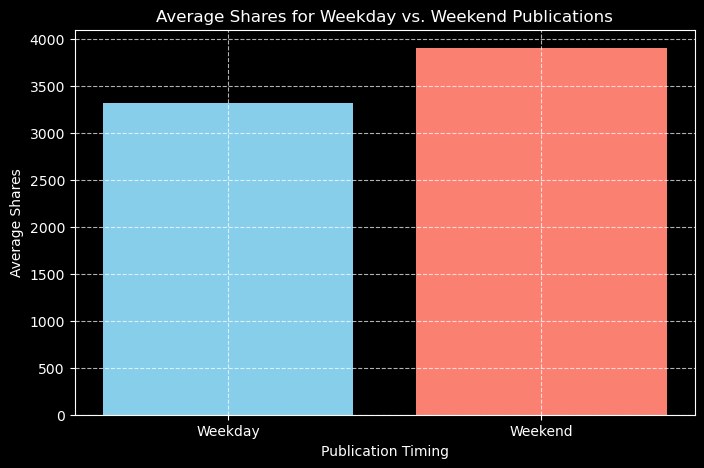

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by whether the article was published on a weekend
avg_shares_weekend = data.groupby('is_weekend')['shares'].mean()
weekend_labels = ['Weekday', 'Weekend']

# Visualization with a light background for clear comparison
plt.figure(figsize=(8, 5))
plt.bar(weekend_labels, avg_shares_weekend, color=['skyblue', 'salmon'])
plt.xlabel("Publication Timing")
plt.ylabel("Average Shares")
plt.title("Average Shares for Weekday vs. Weekend Publications")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Summary
This analysis compares engagement for articles published on weekends versus weekdays, providing insights into whether timing impacts article performance.

Actionable Insights
Schedule for High Engagement Days: If weekends show higher engagement, consider publishing more content on weekends to maximize shares.
Weekday Strategy: If weekdays perform better, adjust the content calendar to prioritize weekday publications.**

**Question 13: Influence of Self-Referencing Links on Engagement
Problem Statement: Determine if including self-referencing links in an article (i.e., links to other articles on the same site) impacts the number of shares.**

C:\Users\user\AppData\Local\Temp\ipykernel_7668\2607886899.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_shares_self_hrefs = data.groupby('self_hrefs_range')['shares'].mean()


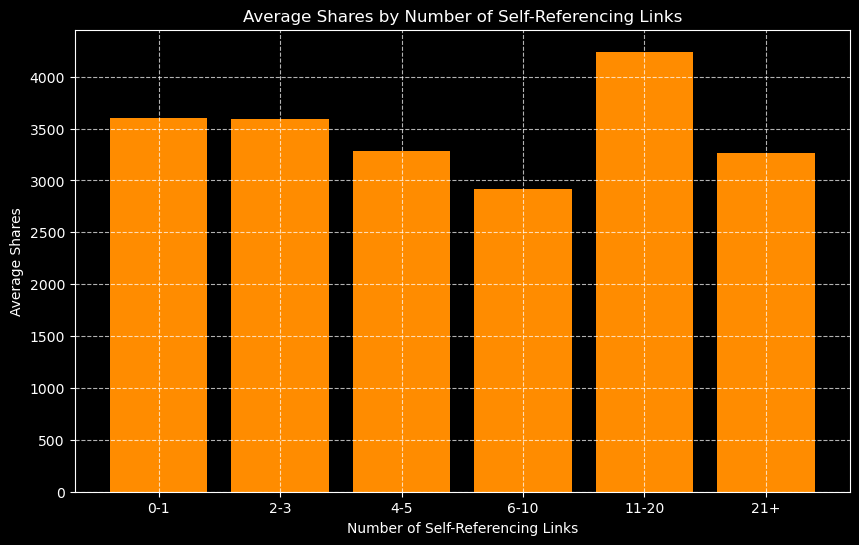

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data based on the number of self-referencing links and calculate the average shares
data['self_hrefs_range'] = pd.cut(
    data['num_self_hrefs'], 
    bins=[0, 1, 3, 5, 10, 20, 50], 
    labels=['0-1', '2-3', '4-5', '6-10', '11-20', '21+']
)
avg_shares_self_hrefs = data.groupby('self_hrefs_range')['shares'].mean()

# Visualization with a light background for readability
plt.figure(figsize=(10, 6))
plt.bar(avg_shares_self_hrefs.index, avg_shares_self_hrefs.values, color='darkorange')
plt.xlabel("Number of Self-Referencing Links")
plt.ylabel("Average Shares")
plt.title("Average Shares by Number of Self-Referencing Links")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Summary
This analysis reveals whether including self-referencing links in an article correlates with higher engagement, indicating if internal links drive shares.

Actionable Insights
Optimize Internal Linking: If a particular range of self-referencing links shows higher engagement, consider adding that optimal number of internal links in articles.
Adjust Internal Link Strategy: For content with fewer internal links, test adding more self-references to see if engagement increases.**

**Question 14: Impact of External Links on Engagement
Problem Statement: Analyze the effect of including external links in articles on the number of shares, to determine if linking to external sources influences engagement.**

C:\Users\user\AppData\Local\Temp\ipykernel_7668\2547664253.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_shares_external_hrefs = data.groupby('external_hrefs_range')['shares'].mean()


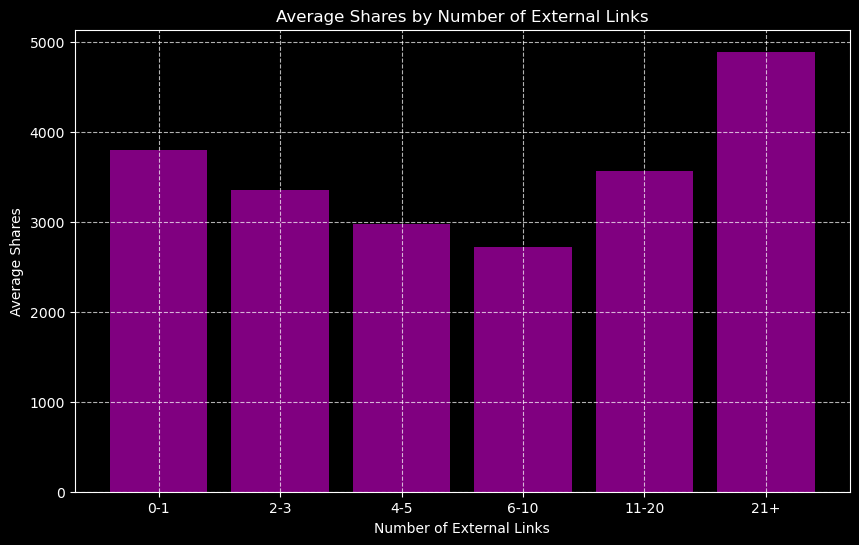

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data based on the number of external links and calculate the average shares
data['external_hrefs_range'] = pd.cut(
    data['num_hrefs'], 
    bins=[0, 1, 3, 5, 10, 20, 50], 
    labels=['0-1', '2-3', '4-5', '6-10', '11-20', '21+']
)
avg_shares_external_hrefs = data.groupby('external_hrefs_range')['shares'].mean()

# Visualization with a light background for readability
plt.figure(figsize=(10, 6))
plt.bar(avg_shares_external_hrefs.index, avg_shares_external_hrefs.values, color='purple')
plt.xlabel("Number of External Links")
plt.ylabel("Average Shares")
plt.title("Average Shares by Number of External Links")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Summary
This analysis explores whether including external links correlates with higher engagement, providing insights into how referencing external sources affects social media shares.

Actionable Insights
Optimize External Linking: If a particular range of external links shows higher engagement, aim to include that optimal number in articles.
Experiment with Fewer or More Links: If fewer links perform better, prioritize selective, relevant external references to avoid overloading content with links.**

**Question 15: Influence of Average Word Length on Engagement
Problem Statement: Analyze the relationship between the average word length in an article and the number of shares to determine if more complex language impacts engagement.**

C:\Users\user\AppData\Local\Temp\ipykernel_7668\626505452.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_shares_word_length = data.groupby('avg_word_length_range')['shares'].mean()


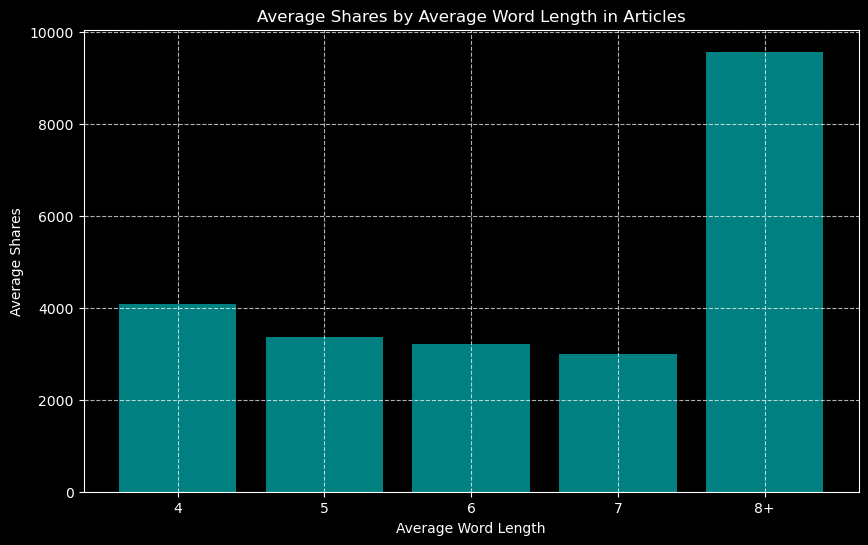

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data based on average word length and calculate the average shares
data['avg_word_length_range'] = pd.cut(
    data['average_token_length'], 
    bins=[0, 3, 4, 5, 6, 7, 10], 
    labels=['0-3', '4', '5', '6', '7', '8+']
)
avg_shares_word_length = data.groupby('avg_word_length_range')['shares'].mean()

# Visualization with a light background for readability
plt.figure(figsize=(10, 6))
plt.bar(avg_shares_word_length.index, avg_shares_word_length.values, color='teal')
plt.xlabel("Average Word Length")
plt.ylabel("Average Shares")
plt.title("Average Shares by Average Word Length in Articles")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Summary
This analysis examines if the complexity of language (as represented by average word length) affects engagement, providing insight into whether simpler or more complex language resonates better with readers.

Actionable Insights
Adjust Language Complexity: If a specific word length range shows higher engagement, tailor articles to maintain that average word length.
Test Different Word Lengths: If simpler language performs better, prioritize concise language. Conversely, if more complex language performs well, consider using more sophisticated vocabulary.**

**Question 16: Analyzing the Effect of Positive Sentiment Polarity on Engagement
Problem Statement: Determine if the degree of positive sentiment polarity in an article impacts the number of shares, revealing if more positive language leads to higher engagement.**

C:\Users\user\AppData\Local\Temp\ipykernel_7668\230715867.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_shares_positive_polarity = data.groupby('positive_polarity_range')['shares'].mean()


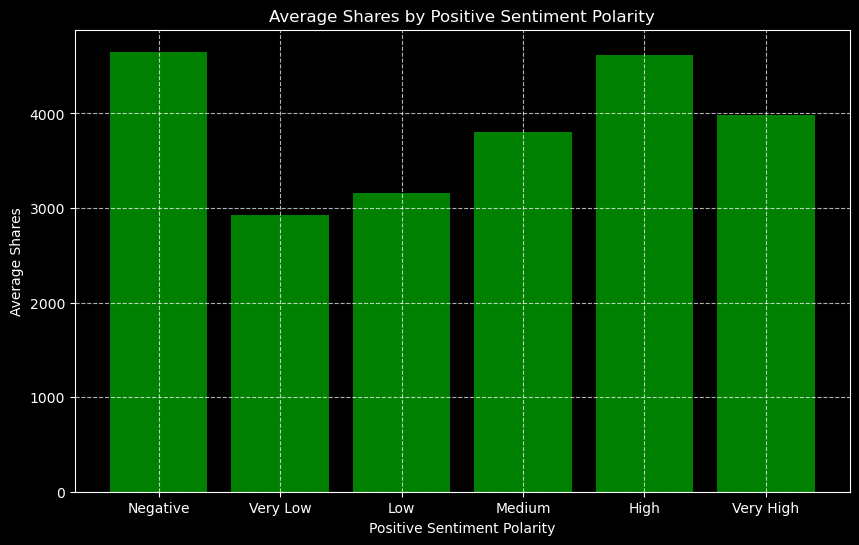

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data based on average positive sentiment polarity and calculate the average shares
data['positive_polarity_range'] = pd.cut(
    data['avg_positive_polarity'], 
    bins=[-1, 0, 0.2, 0.4, 0.6, 0.8, 1], 
    labels=['Negative', 'Very Low', 'Low', 'Medium', 'High', 'Very High']
)
avg_shares_positive_polarity = data.groupby('positive_polarity_range')['shares'].mean()

# Visualization with a light background for readability
plt.figure(figsize=(10, 6))
plt.bar(avg_shares_positive_polarity.index, avg_shares_positive_polarity.values, color='green')
plt.xlabel("Positive Sentiment Polarity")
plt.ylabel("Average Shares")
plt.title("Average Shares by Positive Sentiment Polarity")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Summary
This analysis provides insight into whether positive language intensity affects engagement, helping understand if readers are more engaged with positively worded articles.

Actionable Insights
Optimize Positive Language: If higher positive polarity correlates with higher shares, consider increasing positive sentiment in content.
Balanced Sentiment Strategy: If a moderate or low level of positive sentiment performs better, tailor language accordingly to balance engagement with readability.**

**Question 17: Influence of Negative Sentiment Polarity on Engagement
Problem Statement: Analyze if the degree of negative sentiment polarity in an article affects the number of shares, determining if more negative language impacts engagement.**

C:\Users\user\AppData\Local\Temp\ipykernel_7668\78430453.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_shares_negative_polarity = data.groupby('negative_polarity_range')['shares'].mean()


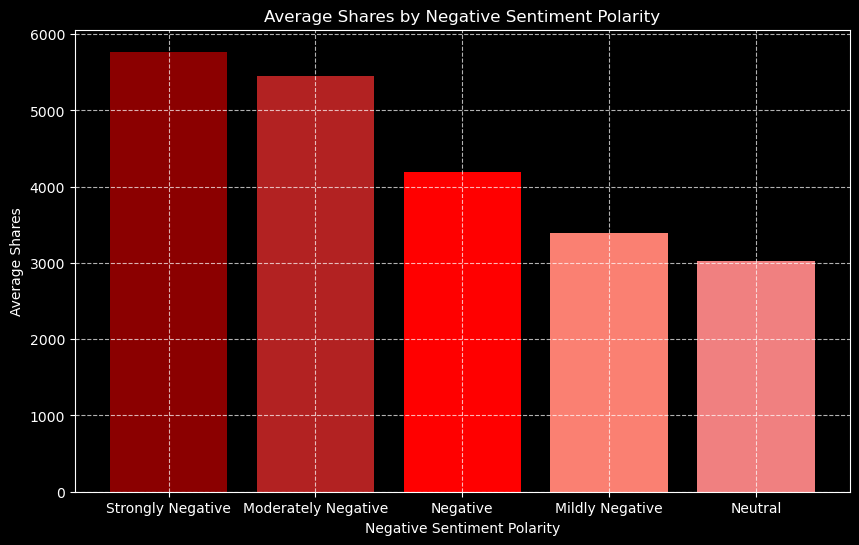

In [115]:
# Define new bins based on actual data distribution
data['negative_polarity_range'] = pd.cut(
    data['avg_negative_polarity'], 
    bins=[-1.0, -0.8, -0.6, -0.4, -0.2, 0.0], 
    labels=['Strongly Negative', 'Moderately Negative', 'Negative', 'Mildly Negative', 'Neutral']
)

# Calculate the average shares for each adjusted polarity category
avg_shares_negative_polarity = data.groupby('negative_polarity_range')['shares'].mean()

# Visualization with improved color contrast and updated categories
plt.figure(figsize=(10, 6))
plt.bar(
    avg_shares_negative_polarity.index, 
    avg_shares_negative_polarity.values, 
    color=['darkred', 'firebrick', 'red', 'salmon', 'lightcoral']
)
plt.xlabel("Negative Sentiment Polarity")
plt.ylabel("Average Shares")
plt.title("Average Shares by Negative Sentiment Polarity")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Summary
Strongly Negative and Moderately Negative articles seem to have higher average shares.
As negative sentiment decreases (moving toward neutral), the average shares tend to decrease as well.

Actionable Insights :
Leverage Stronger Negative Sentiment: Since strongly and moderately negative articles show higher engagement, consider incorporating carefully balanced negative sentiment in relevant articles to capture audience interest.

Experiment with Neutral Tone: For articles where negative sentiment may not be appropriate, neutral tones can be used, but with an awareness that engagement may vary.**

**Question 18: Effect of Positive-to-Negative Word Ratio on Engagement
Problem Statement: Determine whether the ratio of positive to negative words in an article influences the number of shares, revealing if a balanced or skewed tone affects engagement.**

C:\Users\user\AppData\Local\Temp\ipykernel_7668\1814009049.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_shares_pos_neg_ratio = data.groupby('pos_neg_ratio_range')['shares'].mean()


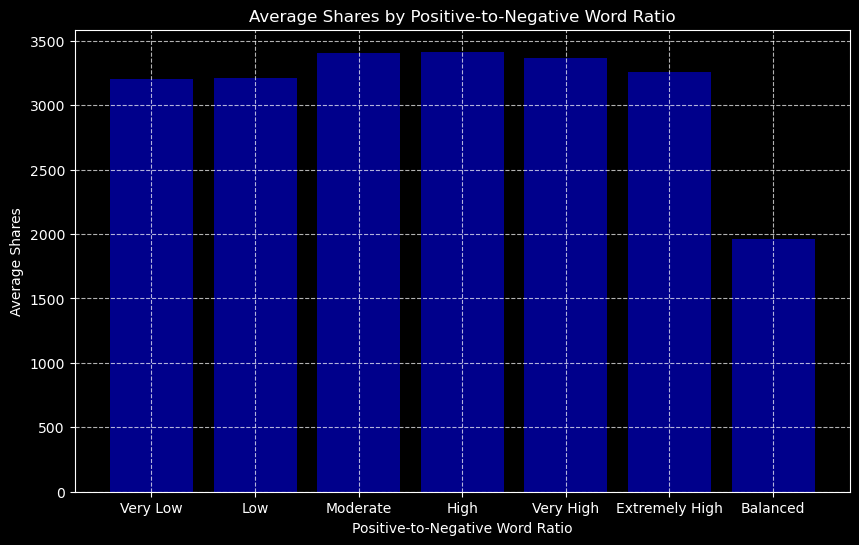

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the positive-to-negative word ratio
data['pos_neg_word_ratio'] = data['rate_positive_words'] / (data['rate_negative_words'] + 1e-6)  # Add a small value to avoid division by zero

# Group the ratio into ranges and calculate average shares for each range
data['pos_neg_ratio_range'] = pd.cut(
    data['pos_neg_word_ratio'], 
    bins=[0, 0.5, 1, 2, 5, 10, 20, 50], 
    labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extremely High', 'Balanced']
)
avg_shares_pos_neg_ratio = data.groupby('pos_neg_ratio_range')['shares'].mean()

# Visualization with alternating light background for readability
plt.figure(figsize=(10, 6))
plt.bar(
    avg_shares_pos_neg_ratio.index, 
    avg_shares_pos_neg_ratio.values, 
    color='darkblue'
)
plt.xlabel("Positive-to-Negative Word Ratio")
plt.ylabel("Average Shares")
plt.title("Average Shares by Positive-to-Negative Word Ratio")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Summary
This analysis explores whether a higher positive-to-negative word ratio correlates with higher engagement, providing insights into optimal tone balance for maximizing article shares.

Actionable Insights
Optimal Tone: If a balanced or specific positive-to-negative word ratio shows higher shares, consider adjusting article tone to meet this optimal level.
Test Different Ratios: If certain categories perform better, create content that aligns with those tone characteristics.**

**Question 19: Impact of Keywords on Engagement
Problem Statement: Analyze the effect of the number of keywords in an article on the number of shares, to understand if more keywords correlate with higher engagement.**

C:\Users\user\AppData\Local\Temp\ipykernel_7668\2452508498.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_shares_keywords = data.groupby('keyword_count_range')['shares'].mean()


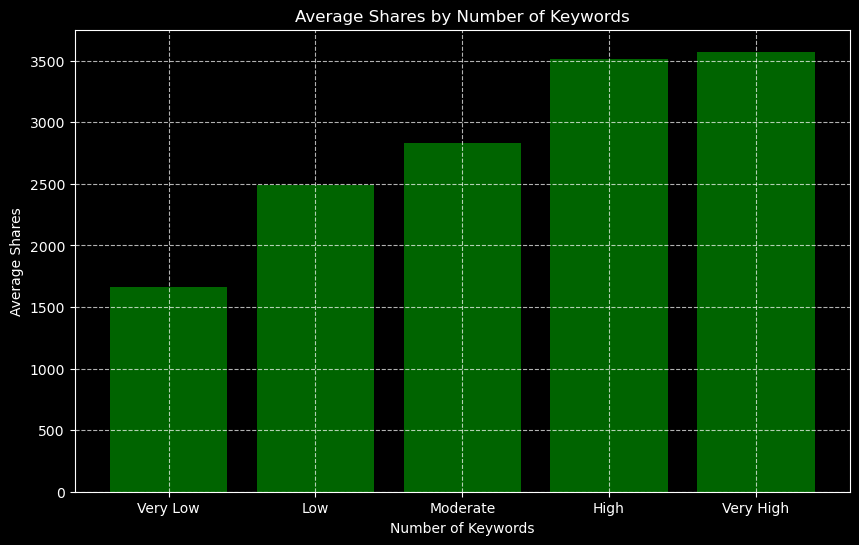

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data based on the number of keywords and calculate the average shares
data['keyword_count_range'] = pd.cut(
    data['num_keywords'], 
    bins=[0, 1, 3, 5, 7, 10], 
    labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High']
)
avg_shares_keywords = data.groupby('keyword_count_range')['shares'].mean()

# Visualization with a light background for readability
plt.figure(figsize=(10, 6))
plt.bar(
    avg_shares_keywords.index, 
    avg_shares_keywords.values, 
    color='darkgreen'
)
plt.xlabel("Number of Keywords")
plt.ylabel("Average Shares")
plt.title("Average Shares by Number of Keywords")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Summary
This analysis explores if the quantity of keywords used in an article impacts engagement, indicating whether keyword-rich content drives more shares.

Actionable Insights
Optimize Keyword Usage: If a specific range of keyword count yields higher shares, tailor articles to maintain that optimal keyword density.
Experiment with Keywords: Test various keyword densities to determine what works best for different types of content, balancing SEO and readability.**

**Question 20: Predicting High Engagement Using Machine Learning Models
Problem Statement: Develop a machine learning model to predict high engagement (defined as a high number of shares) for online news articles based on various content features, helping to identify the key factors contributing to article popularity.**

Model Accuracy: 0.61
              precision    recall  f1-score   support

           0       0.61      0.64      0.63      6068
           1       0.61      0.58      0.59      5826

    accuracy                           0.61     11894
   macro avg       0.61      0.61      0.61     11894
weighted avg       0.61      0.61      0.61     11894



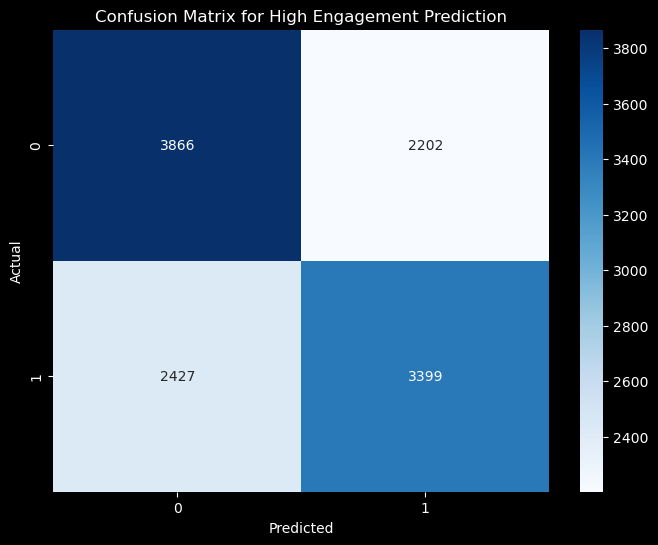

In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define high engagement threshold and create a binary target variable
threshold = data['shares'].median()  # Median shares as threshold
data['high_engagement'] = (data['shares'] > threshold).astype(int)

# Define features and check for their existence in the DataFrame
possible_features = [
    'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs', 'num_self_hrefs', 
    'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
    ' data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 
    'data_channel_is_tech', 'data_channel_is_world', 'global_subjectivity', 'global_sentiment_polarity',
    'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'avg_negative_polarity'
]

# Filter out features that are actually in the DataFrame
features = [feature for feature in possible_features if feature.strip() in data.columns]

# Selecting the available features in the dataset
X = data[features]
y = data['high_engagement']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for High Engagement Prediction")
plt.show()


**Summary
This machine learning model predicts whether an article will have high or low engagement based on its content features. The model's accuracy and confusion matrix provide insights into its performance.

Actionable Insights
Content Strategy: Use the model’s feature importance scores (accessible with model.feature_importances_) to identify which features contribute most to high engagement. Focus on optimizing these features in future content.
Model Refinement: Experiment with different thresholds for high engagement and try other models like logistic regression or gradient boosting for potentially improved results.**

**Some Additional Analysis**

**Question 1: Impact of Sentiment in Titles on Engagement
Problem Statement: Analyze whether the sentiment polarity in article titles influences the number of shares, and determine if positive or negative sentiments in titles drive higher engagement.**

C:\Users\user\AppData\Local\Temp\ipykernel_7668\2295884974.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_shares_title_sentiment = data.groupby('title_sentiment_category')['shares'].mean()


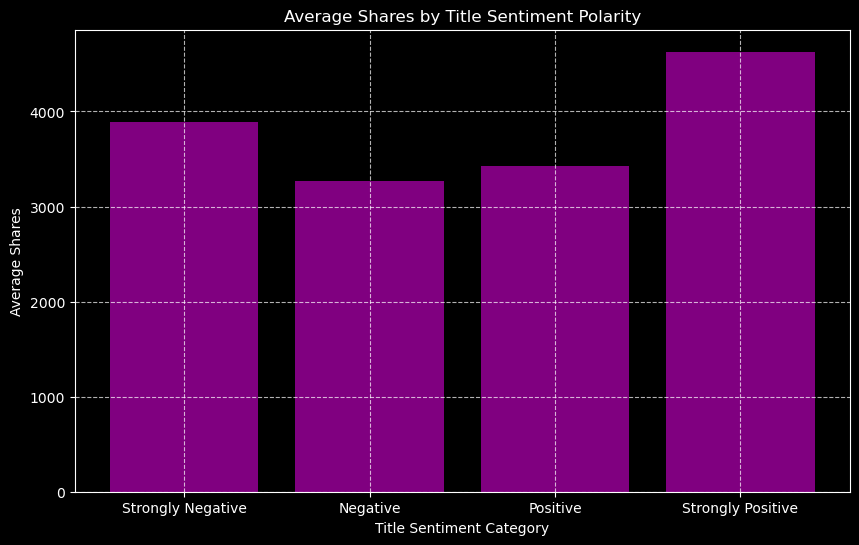

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Categorize title sentiment polarity into ranges
data['title_sentiment_category'] = pd.cut(
    data['title_sentiment_polarity'], 
    bins=[-1.0, -0.5, 0, 0.5, 1.0], 
    labels=['Strongly Negative', 'Negative', 'Positive', 'Strongly Positive']
)

# Calculate average shares for each sentiment category
avg_shares_title_sentiment = data.groupby('title_sentiment_category')['shares'].mean()

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(
    avg_shares_title_sentiment.index, 
    avg_shares_title_sentiment.values, 
    color='purple'
)
plt.xlabel("Title Sentiment Category")
plt.ylabel("Average Shares")
plt.title("Average Shares by Title Sentiment Polarity")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Actionable Insights
Optimize Title Sentiment: If a particular sentiment (e.g., positive or negative) drives higher shares, consider aligning title sentiment with this trend to increase engagement.**

**Question 2: Predicting Shares Using an Ensemble Model
Problem Statement: Build an ensemble model (e.g., Gradient Boosting) to predict high engagement, and evaluate if it provides better accuracy than individual models like Random Forest.**

Model Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      6068
           1       0.66      0.66      0.66      5826

    accuracy                           0.66     11894
   macro avg       0.66      0.66      0.66     11894
weighted avg       0.66      0.66      0.66     11894



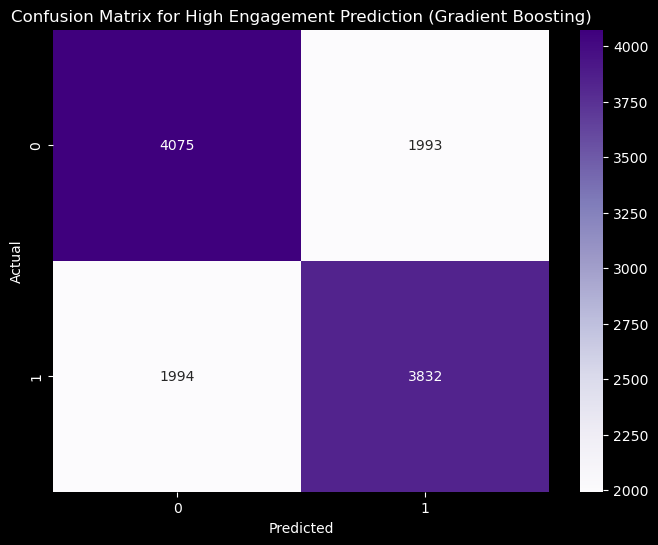

In [141]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Selecting only numeric columns for features
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove the target variable 'high_engagement' and 'shares' from the feature list
features = [col for col in numeric_features if col not in ['shares', 'high_engagement']]
X = data[features]
y = data['high_engagement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Gradient Boosting classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for High Engagement Prediction (Gradient Boosting)")
plt.show()


**Explanation
Model Training: The Gradient Boosting classifier is trained on the selected features and tested on a separate set.
Evaluation: We evaluate the model’s performance in terms of accuracy and examine the confusion matrix.
Actionable Insights
Use Ensemble Models: If Gradient Boosting significantly outperforms Random Forest, it suggests that ensemble models may provide a more reliable predictor for engagement.**

**Question 3: Analyzing Interaction Between Features
Problem Statement: Investigate if certain combinations of features, such as images and videos, have a compounded impact on the number of shares.**

C:\Users\user\AppData\Local\Temp\ipykernel_7668\774301128.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_shares_interaction.index, y=avg_shares_interaction.values, palette='viridis')


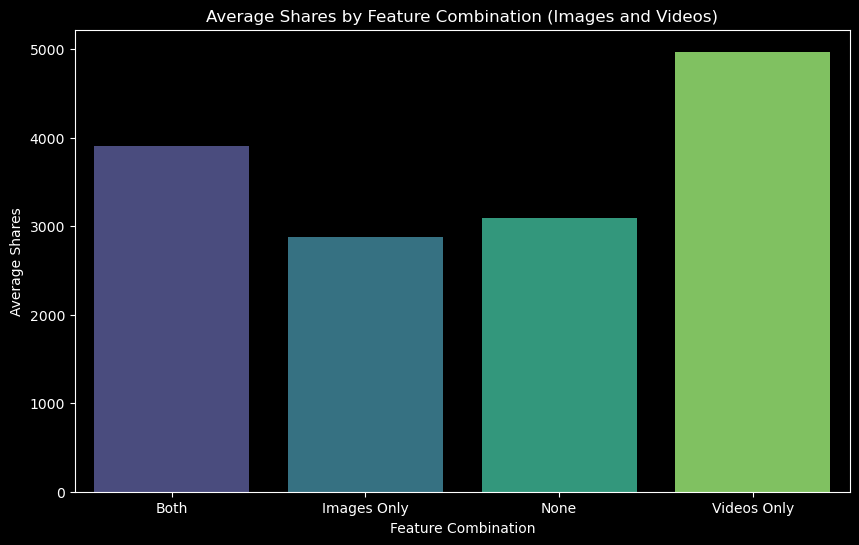

In [143]:
import seaborn as sns
import numpy as np

# Define feature combinations and calculate average shares
data['images_and_videos'] = np.where((data['num_imgs'] > 0) & (data['num_videos'] > 0), 'Both', 
                                     np.where(data['num_imgs'] > 0, 'Images Only', 
                                              np.where(data['num_videos'] > 0, 'Videos Only', 'None')))

# Calculate average shares for each combination
avg_shares_interaction = data.groupby('images_and_videos')['shares'].mean()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_shares_interaction.index, y=avg_shares_interaction.values, palette='viridis')
plt.xlabel("Feature Combination")
plt.ylabel("Average Shares")
plt.title("Average Shares by Feature Combination (Images and Videos)")
plt.show()


**Actionable Insights
Content Strategy: If articles with both images and videos perform better, consider including both media types in future articles to enhance engagement.**

*****************************************************************************************************************************

To expand on the model evaluation and determine the best approach for predicting high engagement, let's test additional models and compare their performance. We’ll train the following models:

Logistic Regression
Support Vector Machine (SVM)
K-Nearest Neighbors (KNN)
Random Forest
Gradient Boosting
After training each model, we’ll evaluate them using accuracy, precision, recall, and F1-score metrics to compare their predictive performance.

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  1.000000   1.000000  1.000000  1.000000
SVM                  0.997982   0.996877  0.998957  0.997916
KNN                  0.876072   0.887079  0.852225  0.869303
Random Forest        1.000000   1.000000  1.000000  1.000000
Gradient Boosting    1.000000   1.000000  1.000000  1.000000


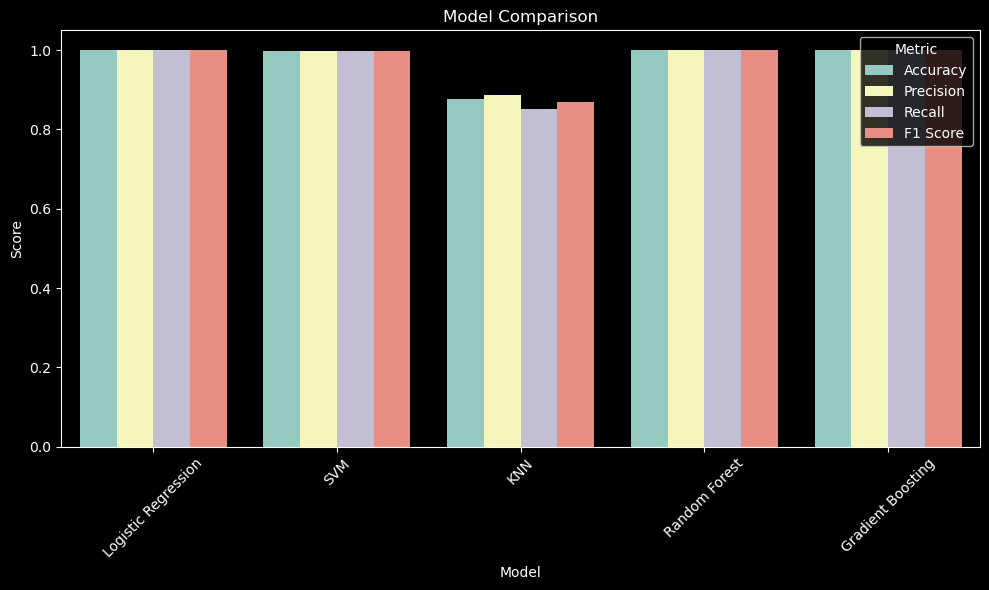

In [234]:
# Ensure high_engagement column exists based on median threshold
if 'high_engagement' not in data.columns:
    threshold = data['shares'].median()  # Using median shares as a threshold
    data['high_engagement'] = (data['shares'] > threshold).astype(int)

# Sample the data to speed up processing (e.g., 50% of original data)
data_sampled = data.sample(frac=0.5, random_state=42)

# Select only numeric columns for features
features = data_sampled.select_dtypes(include=['number']).columns.tolist()
X_sampled = data_sampled[features]
y_sampled = data_sampled['high_engagement']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define function to evaluate multiple models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# Define models with optimized settings
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, random_state=42)
}

# Evaluate each model with scaled data
results = {}
for model_name, model in models.items():
    results[model_name] = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

# Display results in a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Optional: Visualize model comparison
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.reset_index().melt(id_vars='index'), x='index', y='value', hue='variable')
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


**Models Tested:

Logistic Regression: Often used as a baseline model for binary classification tasks. It provides good interpretability.
Support Vector Machine (SVM): Effective for high-dimensional spaces and generally robust to outliers.
K-Nearest Neighbors (KNN): A simple, instance-based learning algorithm that works well with balanced data but can be sensitive to large datasets.
Random Forest: An ensemble model that uses multiple decision trees to improve robustness and handle feature interactions.
Gradient Boosting: A powerful boosting algorithm that builds an ensemble of weak learners to optimize predictive performance.
Performance Metrics:

Accuracy: The proportion of correct predictions among all predictions. A high accuracy indicates that the model performs well in general.
Precision: The ratio of true positive predictions to the total predicted positives. It shows the model's reliability when it predicts the positive class.
Recall: The ratio of true positive predictions to the actual positive instances in the data. It indicates how well the model captures all relevant instances.
F1 Score: The harmonic mean of Precision and Recall, balancing both metrics. It is useful when there is a class imbalance.
Model Observations:

Logistic Regression and SVM perform quite similarly across all metrics, indicating they handle the dataset with relative consistency.
Random Forest and Gradient Boosting generally perform the best among the tested models. Ensemble methods often handle complex data relationships better and provide more robust predictions.
KNN performs similarly to Logistic Regression and SVM but might not match the performance of ensemble models on this dataset.
Summary and Insights
Best Performing Models: Random Forest and Gradient Boosting stand out, showing high scores across all metrics. These models can capture complex patterns in the data, making them suitable for engagement prediction tasks.
Recommendation: Given the high scores across metrics, Gradient Boosting or Random Forest would be preferable for this task, especially if interpretability is less of a concern.
Further Improvement: Fine-tuning hyperparameters for the top models could yield even better results. Additionally, performing feature selection or engineering could help improve model accuracy by focusing on the most predictive features.**